In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Square Meter vs Price**

In [30]:
squareMeter = [50, 60, 70, 80, 90, 55, 65, 75, 85, 95] # X value

price = [150, 180, 210, 240, 270, 165, 195, 225, 255, 285] # Y value

Text(0, 0.5, 'Price x 1000$')

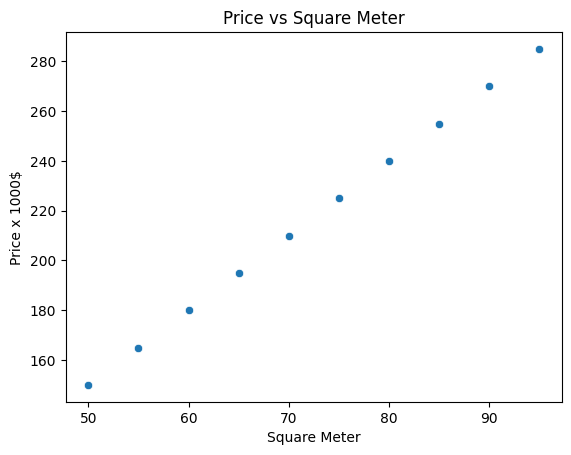

In [32]:
sns.scatterplot(x=squareMeter, y=price)
plt.title("Price vs Square Meter")
plt.xlabel("Square Meter")
plt.ylabel("Price x 1000$")

The **Linear Regression** formula for predicting the **y value** is:

**Predicted y value** = **slope** * **x** **+** **intercept/bias**

In our case, the formula will be:

**Predicted Price** = **slope** * **Square Meter** + **intercept**

We are going to be using **Residual Sum of Squares** as our *loss function*

We must take a random value for both of **slope** and **intercept**.

In [18]:
intercept = np.random.randn(1)
slope = np.random.randn(1)

**X** is **Square Meter**

**y** is **Price**

In [16]:
def predict(X, intercept, slope):
    return X*slope + intercept

In [23]:
def rss_errors(Y, y_pred):
    return (Y-y_pred)**2

In [36]:
def compute_rss(X,Y,intercept,slope):
    #X is price
    #Y is square meter
    #y_pred is the predicted value
    rss_total = 0
    for i in range(len(X)):
        y_pred = predict(X[i], intercept, slope)
        rss_total += rss_errors(Y[i],y_pred)
    return rss_total
    

In [37]:
rss = compute_rss(squareMeter, price, intercept, slope)
print(f"Residual Sum of Squares at the beginning: {rss}")

Residual Sum of Squares at the beginning: [479843.82443889]


We need the derivative of RSS with respect to both intercept, and slope.

In [42]:
def derivative_with_respect_to_intercept(Y, y_pred):
    return -2 * (Y - y_pred)

def derivative_with_respect_to_slope(X, Y, y_pred):
    return -2 * X * (Y - y_pred)

These are the derivative points for the first index in the data set for both of **intercept**, and the **slope**:

In [43]:
y_pred = predict(squareMeter[0], intercept, slope)
first_d_intercept = derivative_with_respect_to_intercept(price[0], y_pred)
first_d_slope = derivative_with_respect_to_slope(squareMeter[0], price[0], y_pred)

In [44]:
print(f"First Derivative Value for Intercept: {first_d_intercept}")

print(f"First Derivative Value for Slope: {first_d_slope}")

First Derivative Value for Intercept: [-297.43985626]
First Derivative Value for Slope: [-14871.99281283]


We need to set up a learning rate for our algorithm.

In [38]:
learning_rate = 0.01